In [2]:
from Functions import *

In [3]:
os.environ['OMP_NUM_THREADS'] = '1'

# Clustering 

In [5]:
Data = pd.read_csv('./DATA/customers_new_features_encoded')

In [6]:
Data.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Has_Partner  Marital_Status_Single  Age_Group_18-30  \
0                           0                      1                0   
1                           0                      1                0   
2                           1                      0                0   
3                           1                      0                1   
4                           1                      0                0   

   Age_Group_31-45  Age_Group_46-60  Age_Group_61-121  
0                0                1                 0  
1                0                1                 0  
2                0                1                 0  
3                0                0                 0  
4                1                0                 0  

[5 rows x 42 columns]

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      2205 non-null   float64
 1   Kidhome                     2205 non-null   int64  
 2   Teenhome                    2205 non-null   int64  
 3   Recency                     2205 non-null   int64  
 4   MntWines                    2205 non-null   int64  
 5   MntFruits                   2205 non-null   int64  
 6   MntMeatProducts             2205 non-null   int64  
 7   MntFishProducts             2205 non-null   int64  
 8   MntSweetProducts            2205 non-null   int64  
 9   MntGoldProds                2205 non-null   int64  
 10  NumDealsPurchases           2205 non-null   int64  
 11  NumWebPurchases             2205 non-null   int64  
 12  NumCatalogPurchases         2205 non-null   int64  
 13  NumStorePurchases           2205 

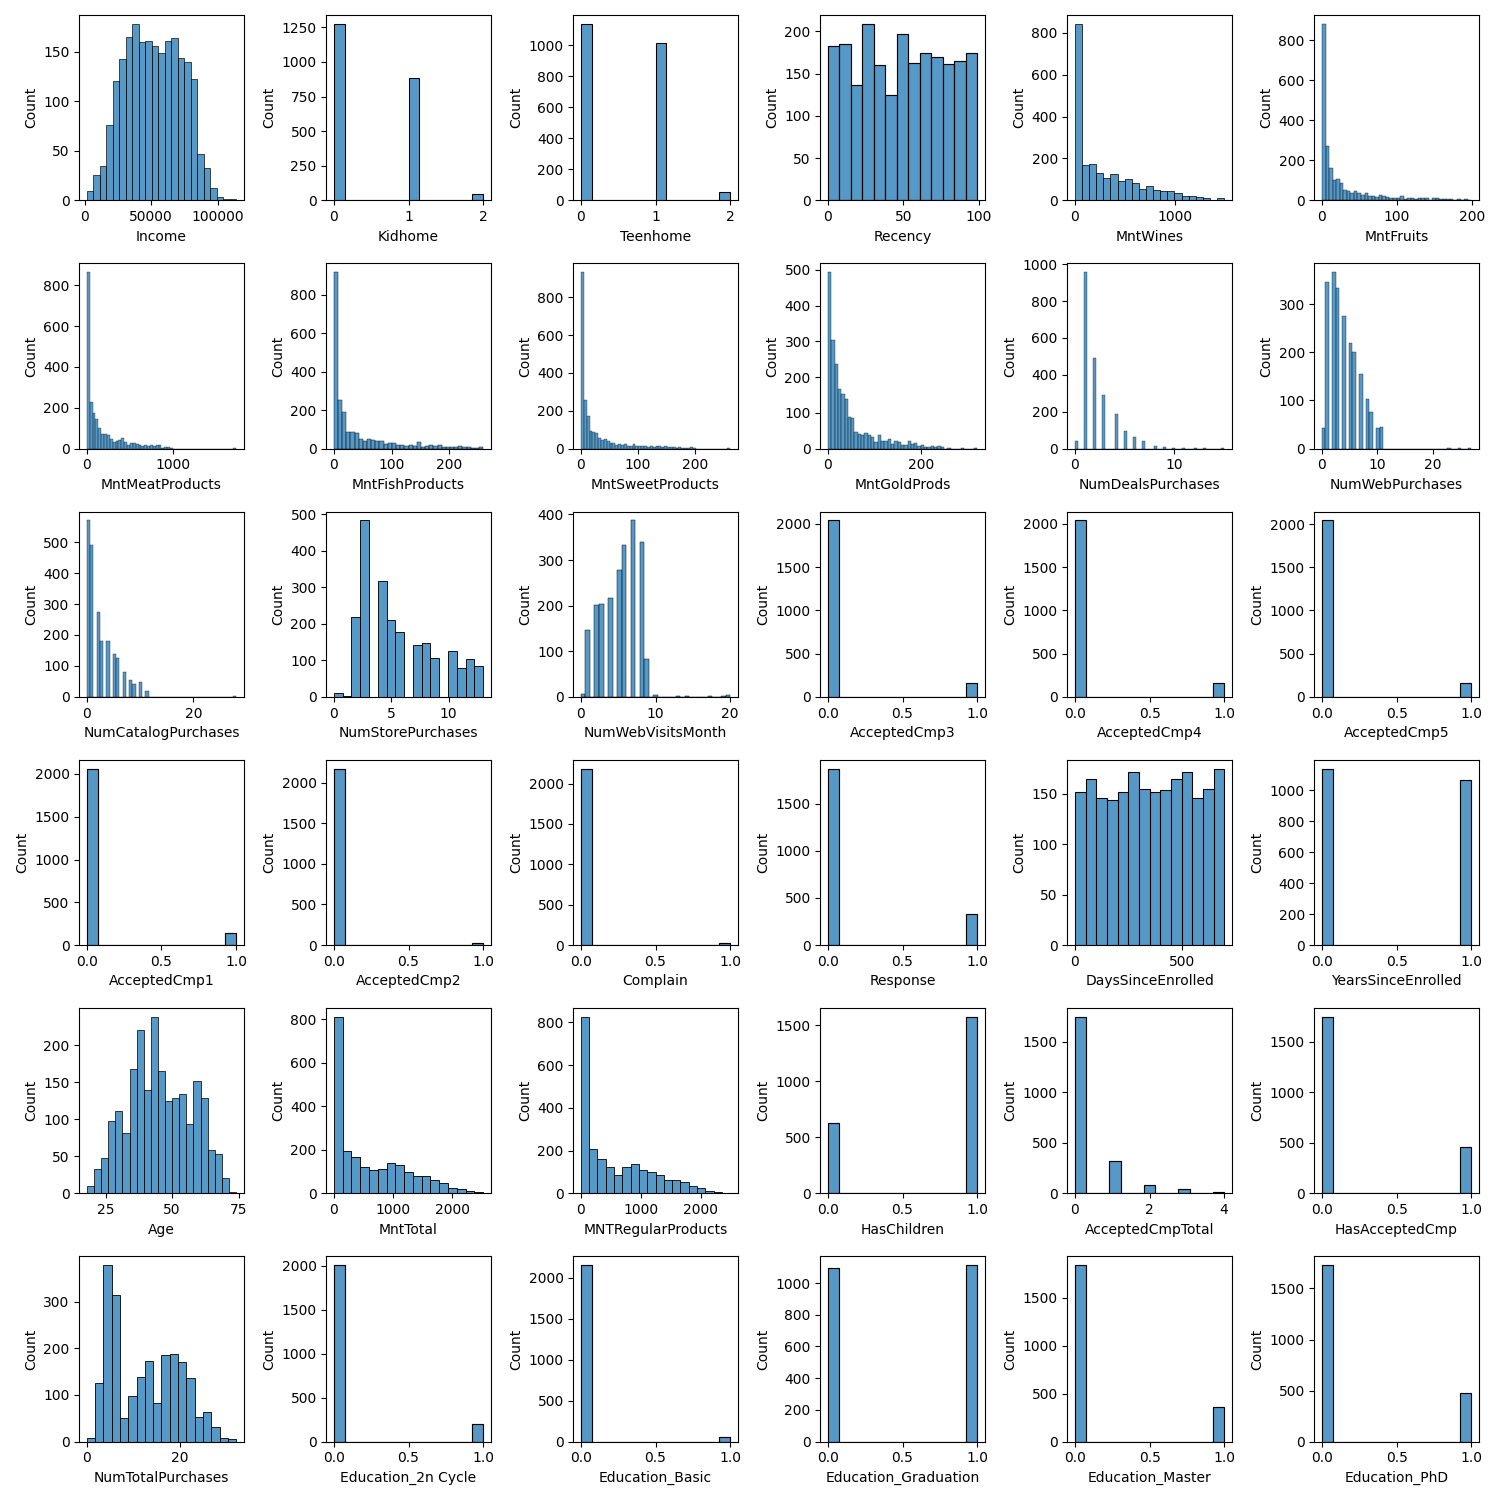

In [8]:
fig, axs = plt.subplots(nrows=6,ncols=6,figsize=(15,15),tight_layout=True)

for ax,feature in zip(axs.flatten(),Data):
    sns.histplot(x=feature,ax=ax,data=Data)

plt.show()

In [9]:
# Com base no grafico as colunas que nao tem um corpontamento similiar a uma distribuicao normal o MNean Scaler nao e uma boa opcao

In [10]:
axs

array([[<Axes: xlabel='Income', ylabel='Count'>,
        <Axes: xlabel='Kidhome', ylabel='Count'>,
        <Axes: xlabel='Teenhome', ylabel='Count'>,
        <Axes: xlabel='Recency', ylabel='Count'>,
        <Axes: xlabel='MntWines', ylabel='Count'>,
        <Axes: xlabel='MntFruits', ylabel='Count'>],
       [<Axes: xlabel='MntMeatProducts', ylabel='Count'>,
        <Axes: xlabel='MntFishProducts', ylabel='Count'>,
        <Axes: xlabel='MntSweetProducts', ylabel='Count'>,
        <Axes: xlabel='MntGoldProds', ylabel='Count'>,
        <Axes: xlabel='NumDealsPurchases', ylabel='Count'>,
        <Axes: xlabel='NumWebPurchases', ylabel='Count'>],
       [<Axes: xlabel='NumCatalogPurchases', ylabel='Count'>,
        <Axes: xlabel='NumStorePurchases', ylabel='Count'>,
        <Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>,
        <Axes: xlabel='AcceptedCmp3', ylabel='Count'>,
        <Axes: xlabel='AcceptedCmp4', ylabel='Count'>,
        <Axes: xlabel='AcceptedCmp5', ylabel='Count'>],

In [11]:
axs.flatten()

array([<Axes: xlabel='Income', ylabel='Count'>,
       <Axes: xlabel='Kidhome', ylabel='Count'>,
       <Axes: xlabel='Teenhome', ylabel='Count'>,
       <Axes: xlabel='Recency', ylabel='Count'>,
       <Axes: xlabel='MntWines', ylabel='Count'>,
       <Axes: xlabel='MntFruits', ylabel='Count'>,
       <Axes: xlabel='MntMeatProducts', ylabel='Count'>,
       <Axes: xlabel='MntFishProducts', ylabel='Count'>,
       <Axes: xlabel='MntSweetProducts', ylabel='Count'>,
       <Axes: xlabel='MntGoldProds', ylabel='Count'>,
       <Axes: xlabel='NumDealsPurchases', ylabel='Count'>,
       <Axes: xlabel='NumWebPurchases', ylabel='Count'>,
       <Axes: xlabel='NumCatalogPurchases', ylabel='Count'>,
       <Axes: xlabel='NumStorePurchases', ylabel='Count'>,
       <Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>,
       <Axes: xlabel='AcceptedCmp3', ylabel='Count'>,
       <Axes: xlabel='AcceptedCmp4', ylabel='Count'>,
       <Axes: xlabel='AcceptedCmp5', ylabel='Count'>,
       <Axes: xlabel

In [12]:
test = zip(axs.flatten(),Data)

In [13]:
list(test)

[(<Axes: xlabel='Income', ylabel='Count'>, 'Income'),
 (<Axes: xlabel='Kidhome', ylabel='Count'>, 'Kidhome'),
 (<Axes: xlabel='Teenhome', ylabel='Count'>, 'Teenhome'),
 (<Axes: xlabel='Recency', ylabel='Count'>, 'Recency'),
 (<Axes: xlabel='MntWines', ylabel='Count'>, 'MntWines'),
 (<Axes: xlabel='MntFruits', ylabel='Count'>, 'MntFruits'),
 (<Axes: xlabel='MntMeatProducts', ylabel='Count'>, 'MntMeatProducts'),
 (<Axes: xlabel='MntFishProducts', ylabel='Count'>, 'MntFishProducts'),
 (<Axes: xlabel='MntSweetProducts', ylabel='Count'>, 'MntSweetProducts'),
 (<Axes: xlabel='MntGoldProds', ylabel='Count'>, 'MntGoldProds'),
 (<Axes: xlabel='NumDealsPurchases', ylabel='Count'>, 'NumDealsPurchases'),
 (<Axes: xlabel='NumWebPurchases', ylabel='Count'>, 'NumWebPurchases'),
 (<Axes: xlabel='NumCatalogPurchases', ylabel='Count'>, 'NumCatalogPurchases'),
 (<Axes: xlabel='NumStorePurchases', ylabel='Count'>, 'NumStorePurchases'),
 (<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>, 'NumWebVisitsMon

- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

In [15]:
# Definição das colunas
one_hot_cols = [
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Response",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "AcceptedCmpTotal",
]



standard_cols = [
    "Income",
    "Age"
]

power_cols = [col for col in Data.columns if col.startswith('Mnt') or col.startswith('Num')]

minmax_cols = [col for col in Data.columns if col not in one_hot_cols + standard_cols + power_cols]

# Criando o ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('OneHot', OneHotEncoder(drop='first'), one_hot_cols),
        ('Standard_process', StandardScaler(), standard_cols),
        ('min_max', MinMaxScaler(), minmax_cols),
        ('power_process', PowerTransformer(), power_cols)
    ]
)

# Aplicando o pré-processamento
Data_transformed = preprocessing.fit_transform(Data)

# Obtendo os nomes das colunas transformadas
feature_names = preprocessing.get_feature_names_out()

# Criando o DataFrame resultante
Data_scaled = pd.DataFrame(Data_transformed, columns=feature_names)

display(Data_scaled.head())

OneHot__HasChildren_1  OneHot__HasAcceptedCmp_1  OneHot__AcceptedCmp1_1  \
0                    0.0                       0.0                     0.0   
1                    1.0                       0.0                     0.0   
2                    0.0                       0.0                     0.0   
3                    1.0                       0.0                     0.0   
4                    1.0                       0.0                     0.0   

   OneHot__AcceptedCmp2_1  OneHot__AcceptedCmp3_1  OneHot__AcceptedCmp4_1  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   OneHot__AcceptedCmp5_1  OneHot__Complain_1  OneHot__Response_1  \
0                     0.0                 0.0                 1.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   

   OneHot__Kidhome_1  ...  power_process__MntFishProducts  \
0                0.0  ...                        1.601839   
1                1.0  ...                       -0.875531   
2                0.0  ...                        1.326078   
3                1.0  ...                       -0.104305   
4                1.0  ...                        0.782743   

   power_process__MntSweetProducts  power_process__MntGoldProds  \
0                         1.387173                     1.089046   
1                        -0.976308                    -0.947497   
2                         0.546813                     0.442997   
3                        -0.525155                    -1.052464   
4                         0.694250                    -0.350932   

   power_process__NumDealsPurchases  power_process__NumWebPurchases  \
0                          0.753752                        1.332973   
1                          0.160834                       -1.382228   
2                         -0.838557                        1.332973   
3                          0.160834                       -0.726457   
4                          1.453779                        0.521339   

   power_process__NumCatalogPurchases  power_process__NumStorePurchases  \
0                            1.747828                         -0.425453   
1                           -0.384719                         -1.473644   
2                            0.150188                          1.239811   
3                           -1.341911                         -0.425453   
4                            0.518935                          0.278071   

   power_process__NumWebVisitsMonth  power_process__MntTotal  \
0                          0.700269                 1.315543   
1                         -0.108417                -1.447153   
2                         -0.527390                 0.658507   
3                          0.300240                -1.123214   
4                         -0.108417                 0.175065   

   power_process__NumTotalPurchases  
0                          1.221174  
1                         -1.319438  
2                          1.025388  
3                         -0.877589  
4                          0.356875  

[5 rows x 47 columns]

In [16]:
power_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'NumTotalPurchases']

In [17]:
minmax_cols

['Recency',
 'DaysSinceEnrolled',
 'MNTRegularProducts',
 'Education_2n Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Has_Partner',
 'Marital_Status_Single',
 'Age_Group_18-30',
 'Age_Group_31-45',
 'Age_Group_46-60',
 'Age_Group_61-121']

In [18]:
Data_scaled_no_onehot_encoder = Data_scaled.columns[~Data_scaled.columns.str.startswith('One')] #o tio e a negacao pro pandas

In [19]:
len(Data_scaled_no_onehot_encoder)

29

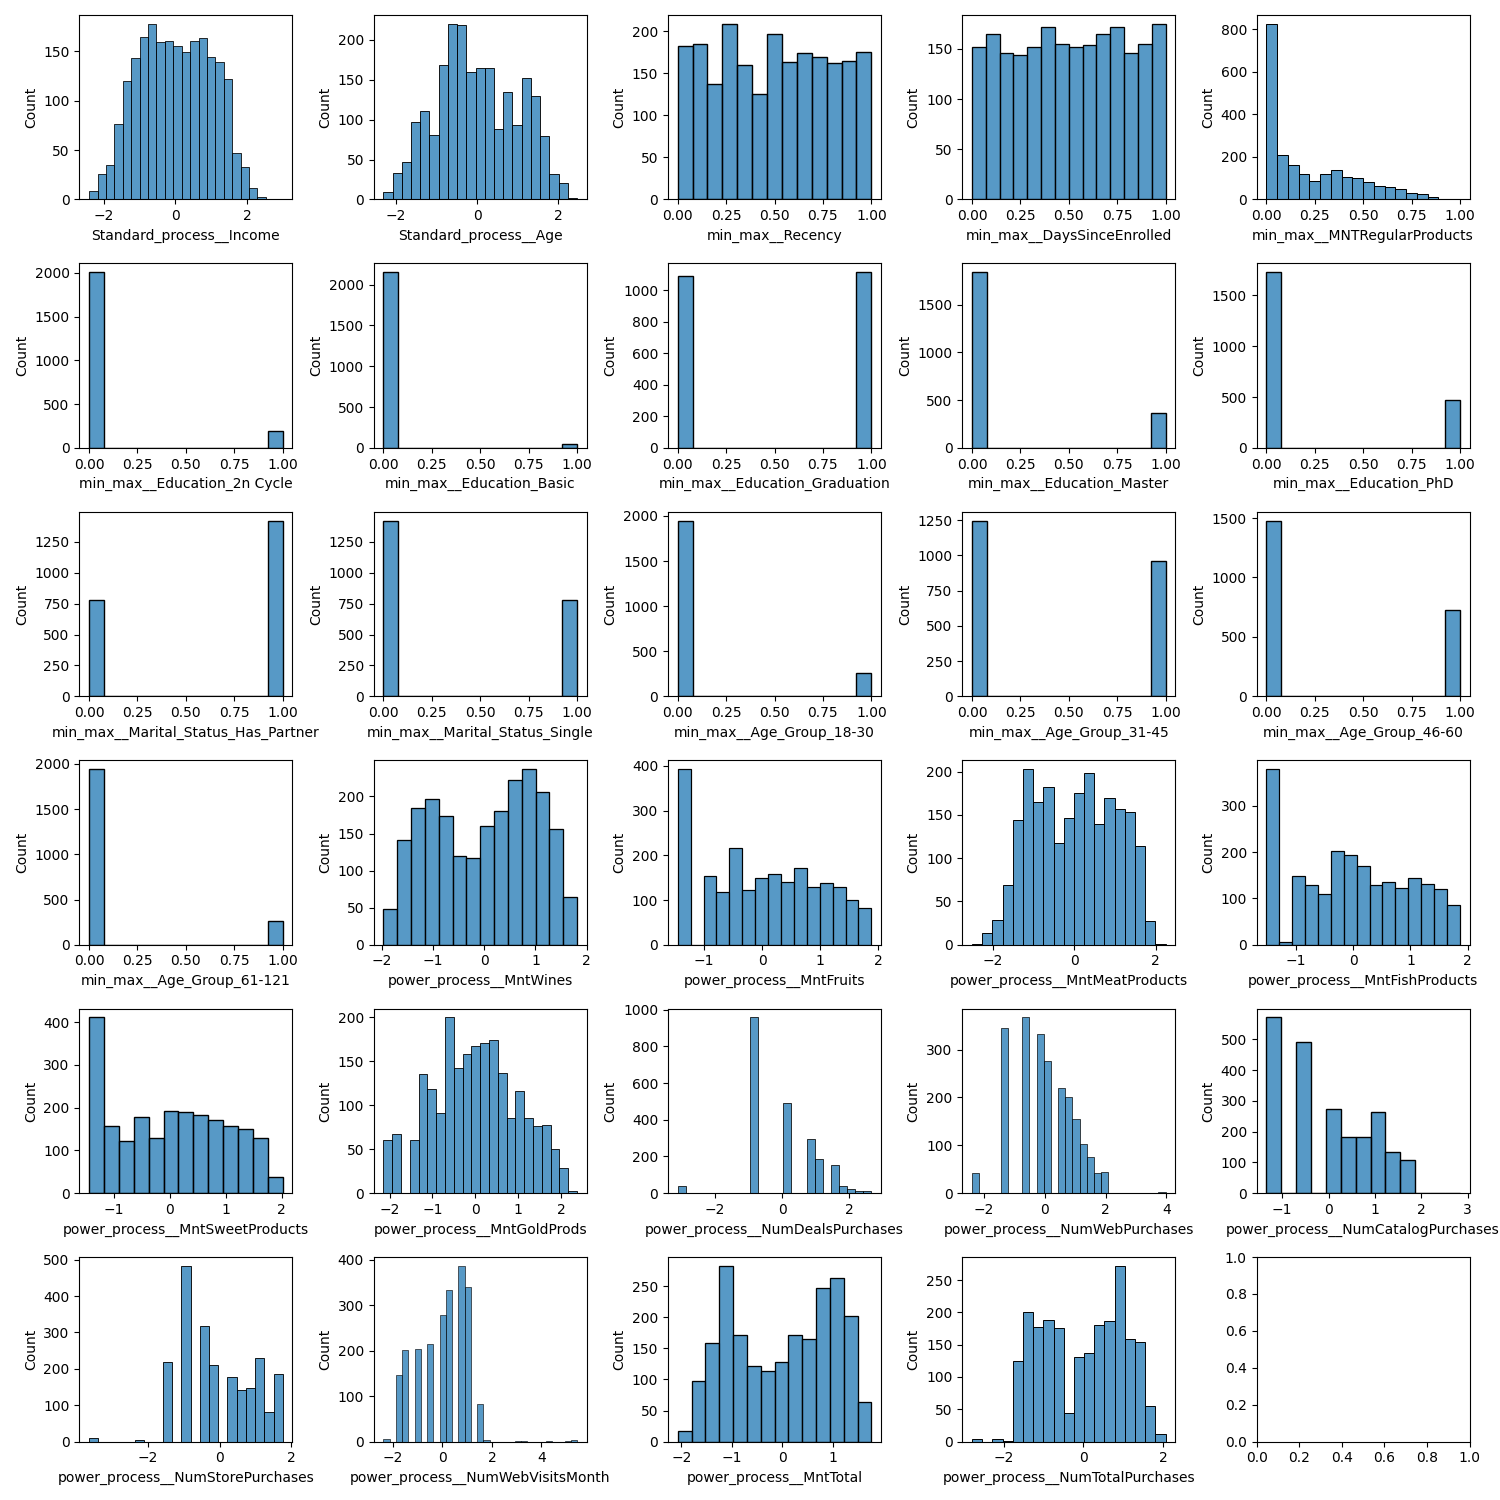

In [20]:
fig, axs = plt.subplots(nrows=6,ncols=5,figsize=(15,15),tight_layout=True)

for ax,feature in zip(axs.flatten(),Data_scaled_no_onehot_encoder):
    sns.histplot(x=feature,ax=ax,data=Data_scaled)

plt.show()

In [21]:
  # jua que o algoritimo usa distanciamento entre pontos , ja que todos estao quase na emsma escala isso pode se melhor para o modelo.

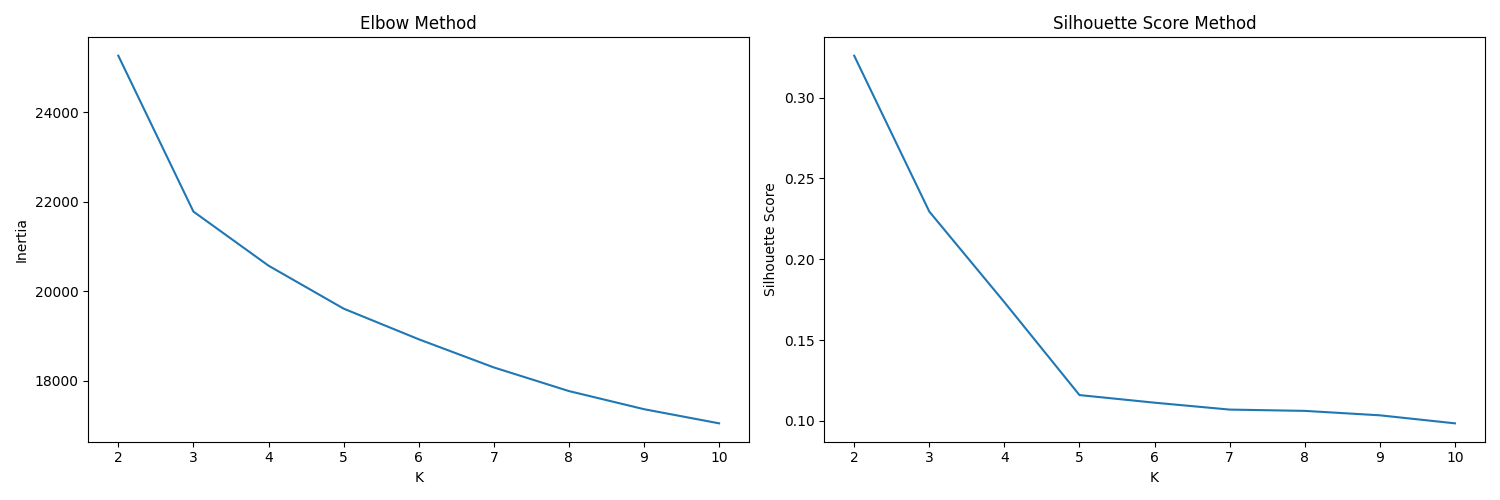

In [22]:
elbow_silhouette_graphic(Data_scaled)

In [23]:
pipeline = Pipeline(
    [
        ('preprossesing',preprocessing),
        ('clustering',KMeans(n_clusters=3,random_state=42,n_init=10))
    ]
    
)

pipeline.fit(Data)

Pipeline(steps=[('preprossesing',
                 ColumnTransformer(transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'AcceptedCmpTotal']),
                                                 ('Standard_process',
                                                  StandardScaler(),
                                                  ['Income', 'Age']),...
                                                   'Age_Group_61-121']),
                                                 ('power_process',
                                                  PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'NumTotalPurchases'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [24]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [25]:
pipeline.named_steps

{'preprossesing': ColumnTransformer(transformers=[('OneHot', OneHotEncoder(drop='first'),
                                  ['HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Response',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'AcceptedCmpTotal']),
                                 ('Standard_process', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('min_max', MinMaxScaler(),
                                  ['Recen...
                                   'Marital_Status_Single', 'Age_Group_18-30',
                                   'Age_Group_31-45', 'Age_Group_46-60',
                                   'Age_Group_61-121']),
                                 ('power_process', Powe

In [26]:
pipeline['clustering'].labels_

array([0, 1, 0, ..., 0, 0, 2])

In [27]:
Original_Data = pd.read_csv('./DATA/customers_IFood.csv') ### ORIGINAL DATA!

In [28]:
DataClustered = Original_Data.copy() 

In [29]:
DataClustered['Cluster'] = pipeline['clustering'].labels_

In [30]:
DataClustered.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation    Has_Partner  71613.0        0         0       26       426   
3  Graduation    Has_Partner  26646.0        1         0       26        11   
4         PhD    Has_Partner  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  YearsSinceEnrolled  Age  \
0         88              546              172  ...                   1   57   
1          1                6                2  ...                   0   60   
2         49              127              111  ...                   0   49   
3          4               20               10  ...                   0   30   
4         43              118               46  ...                   0   33   

   Age_Group  MntTotal  MNTRegularProducts  HasChildren  AcceptedCmpTotal  \
0      46-60      1617                1529            0                 0   
1      46-60        27                  21            1                 0   
2      46-60       776                 734            0                 0   
3      18-30        53                  48            1                 0   
4      31-45       422                 407            1                 0   

   HasAcceptedCmp  NumTotalPurchases  Cluster  
0               0                 22        0  
1               0                  4        1  
2               0                 20        0  
3               0                  6        1  
4               0                 14        2  

[5 rows x 35 columns]

In [31]:
DataClustered['Cluster'].value_counts()

Cluster
1    874
0    689
2    642
Name: count, dtype: int64

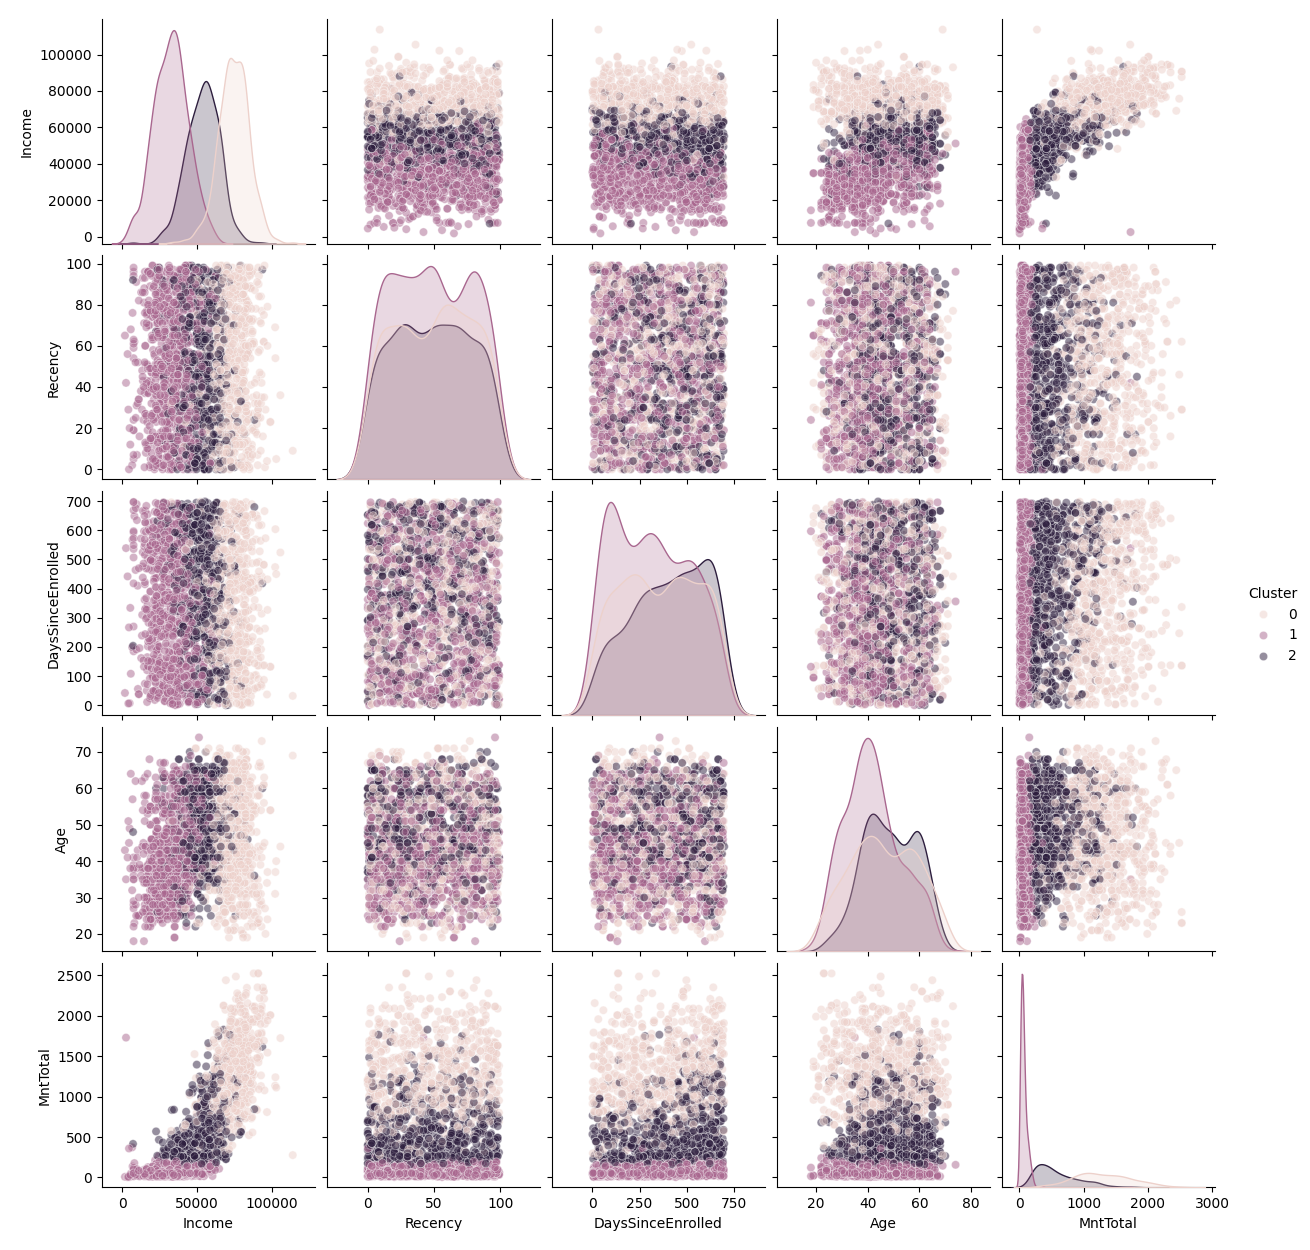

In [88]:
colums_analysis = [
    'Income',
    'Recency',
    'DaysSinceEnrolled',
    'Age',
    'MntTotal',
]

pairplot(DataClustered,colums_analysis,'kde','Cluster')

#plt.savefig("pairplot_clustering.png", dpi=300, bbox_inches='tight')

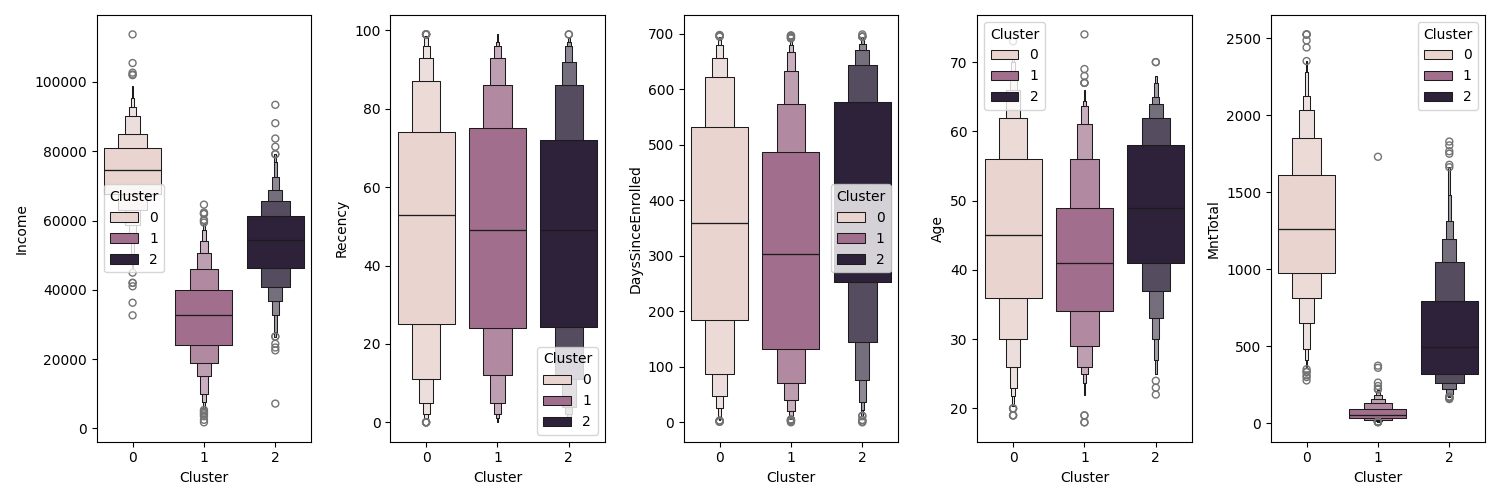

In [33]:
fig, axs = plt.subplots(nrows=1,ncols=5,figsize=(15,5),tight_layout=True)

for ax,col in zip(axs ,colums_analysis):
    sns.boxenplot(x='Cluster', y=col ,data=DataClustered,ax=ax,hue=DataClustered['Cluster'])
    
    
plt.show()#showmeans=True)

In [34]:
print(len(colums_analysis))

5


In [35]:
data_to_pie = DataClustered.groupby('Cluster')[col].sum()

In [36]:
data_to_pie.index

Index([0, 1, 2], dtype='int32', name='Cluster')

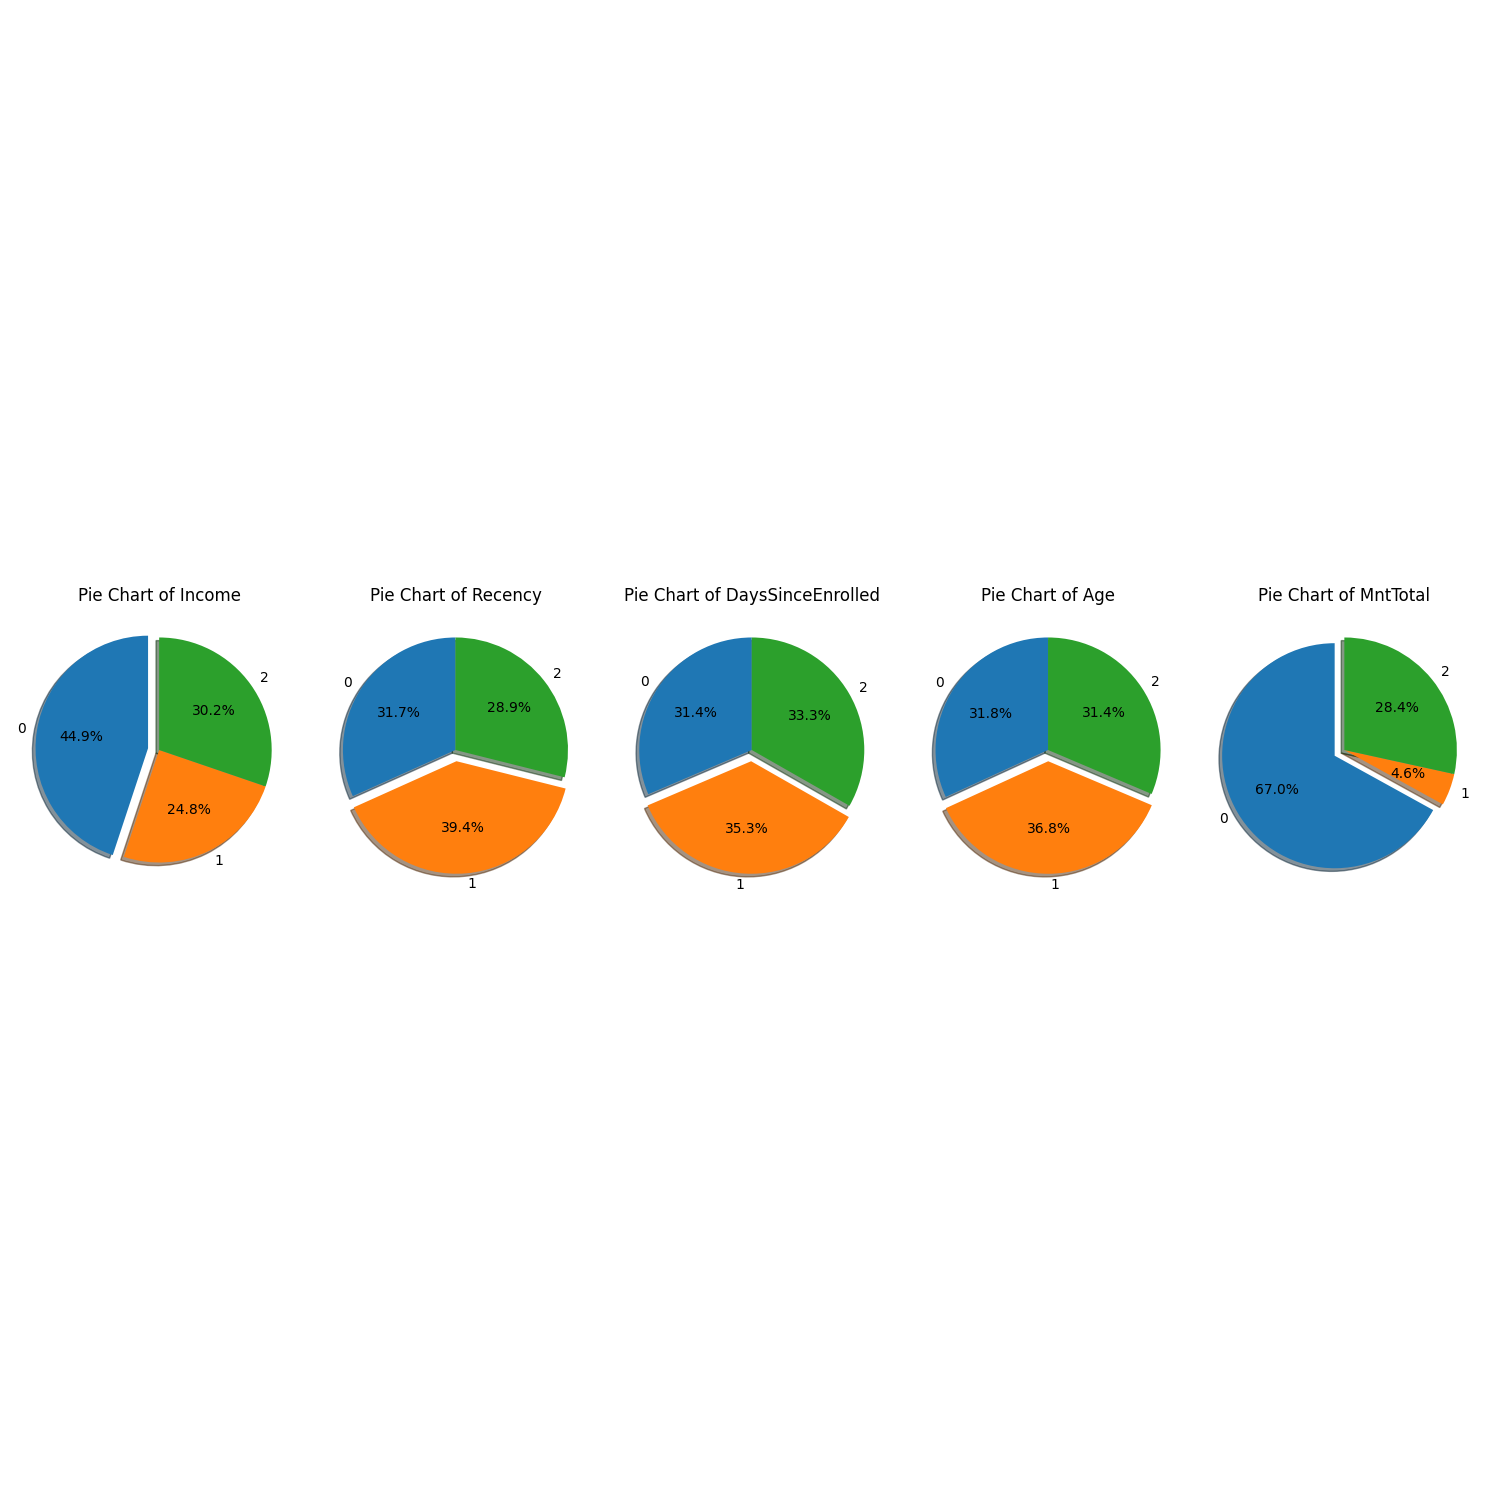

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=len(colums_analysis), figsize=(15, 15), tight_layout=True)

for ax, col in zip(axs.flatten(), colums_analysis):
    data_to_pie = DataClustered.groupby('Cluster')[col].sum()
    
    # Calcula a porcentagem de cada cluster
    percentage = data_to_pie / data_to_pie.sum() * 100
    
    # Encontra a categoria (cluster) com a maior porcentagem
    cluster_with_most_percentage = percentage.idxmax()
    
    # Cria a lista 'explode' para destacar a categoria com a maior porcentagem
    explode = [0.1 if cluster == cluster_with_most_percentage else 0 for cluster in data_to_pie.index]
    
    # Cria o gráfico de pizza
    ax.pie(data_to_pie, labels=data_to_pie.index, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
    ax.set_title(f'Pie Chart of {col}')

plt.show()


In [38]:
columns = [
    'HasChildren',
    'Marital_Status',
    'Education',
    'HasAcceptedCmp',
    'Response',
    'YearsSinceEnrolled',   
]

cluster_diff_cols = ['MntTotal', 'Income']

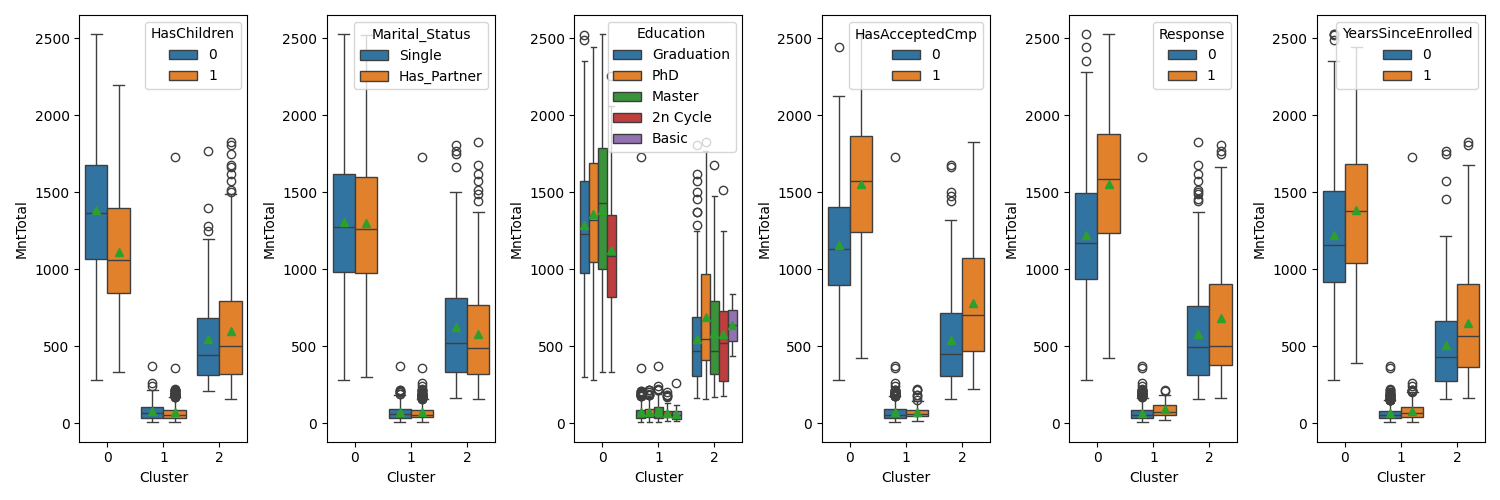

In [39]:
# Ajustando o tamanho da figura e layout
fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(x='Cluster', y=cluster_diff_cols[0], data=DataClustered, ax=ax, showmeans=True, hue=col)
    #ax.set_title(f'Boxplot of {cluster_diff_cols[0]} by Cluster and {col}')

plt.show()

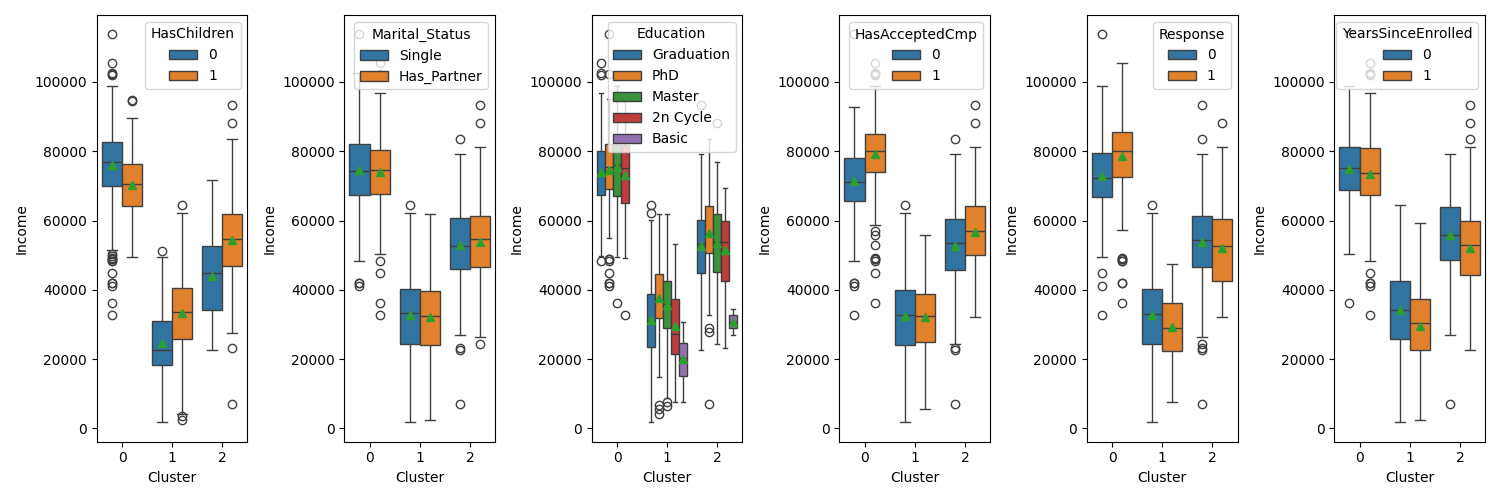

In [40]:
# Ajustando o tamanho da figura e layout
fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5), tight_layout=True)

for ax, col in zip(axs, columns):
    sns.boxplot(x='Cluster', y=cluster_diff_cols[1], data=DataClustered, ax=ax, showmeans=True, hue=col)
    #ax.set_title(f'Boxplot of {cluster_diff_cols[0]} by Cluster and {col}')

plt.show()

In [41]:
DataClustered['Cluster'].nunique()

3

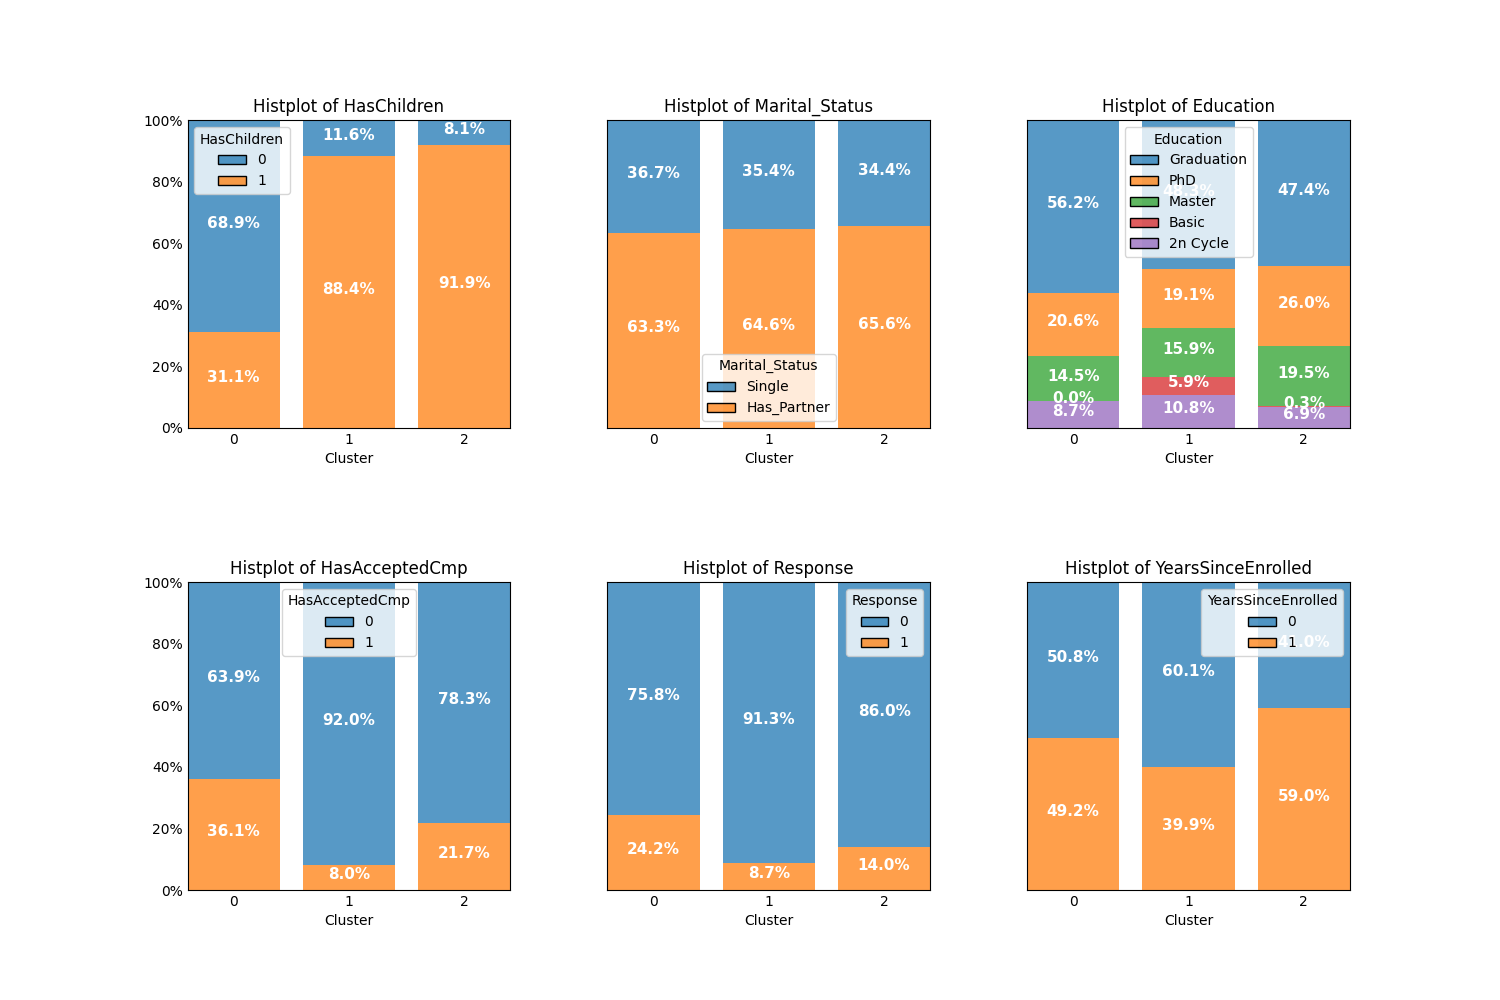

In [42]:
plot_columns_percent_by_cluster(DataClustered, columns, (2, 3), figsize=(15, 10), column_cluster='Cluster')

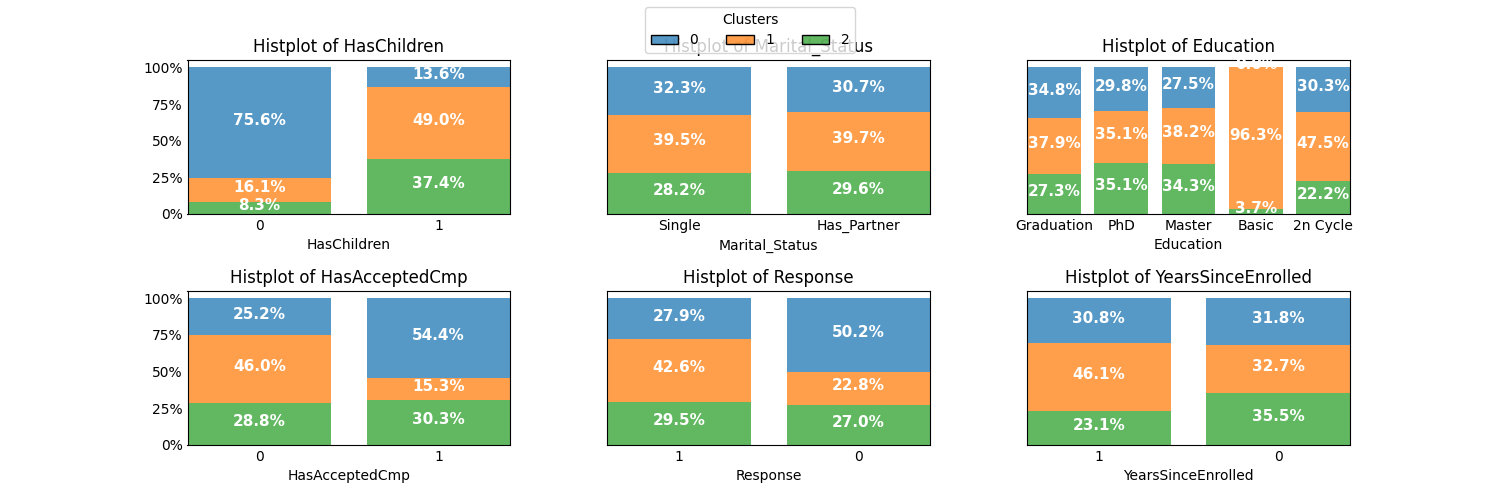

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 5), sharey=True)
for ax, col in zip(axs.flatten(), columns):
    h = sns.histplot(x=col, data=DataClustered, ax=ax, hue='Cluster', multiple='fill', stat='percent', discrete=True, shrink=0.8, palette='tab10')
    ax.set_title(f'Histplot of {col}')
    
    # Verificar se a coluna é numérica para ajustar os ticks do eixo X
    if pd.api.types.is_numeric_dtype(DataClustered[col]):
        ax.set_xticks(range(len(DataClustered[col].unique())))
        ax.set_xticklabels(DataClustered[col].unique())
    
    ax.set_yticklabels('')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='both', length=0)
    
    # Adicionar rótulos de barras
    for bars in h.containers:
        h.bar_label(bars, label_type='center', labels=[f'{b.get_height():.1%}' for b in bars], color='white', weight='bold', fontsize=11, padding=2)
    
    # Remover linhas das barras
    for bar in h.patches:
        bar.set_linewidth(0)
    legend = h.get_legend()
    legend.remove()
labels =[text.get_text() for text in legend.get_texts()]
fig.legend(handles=legend.legend_handles, labels=labels,loc='upper center',ncols=DataClustered['Cluster'].nunique(),title='Clusters')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [44]:
[text.get_text() for text in legend.get_texts()]

['0', '1', '2']

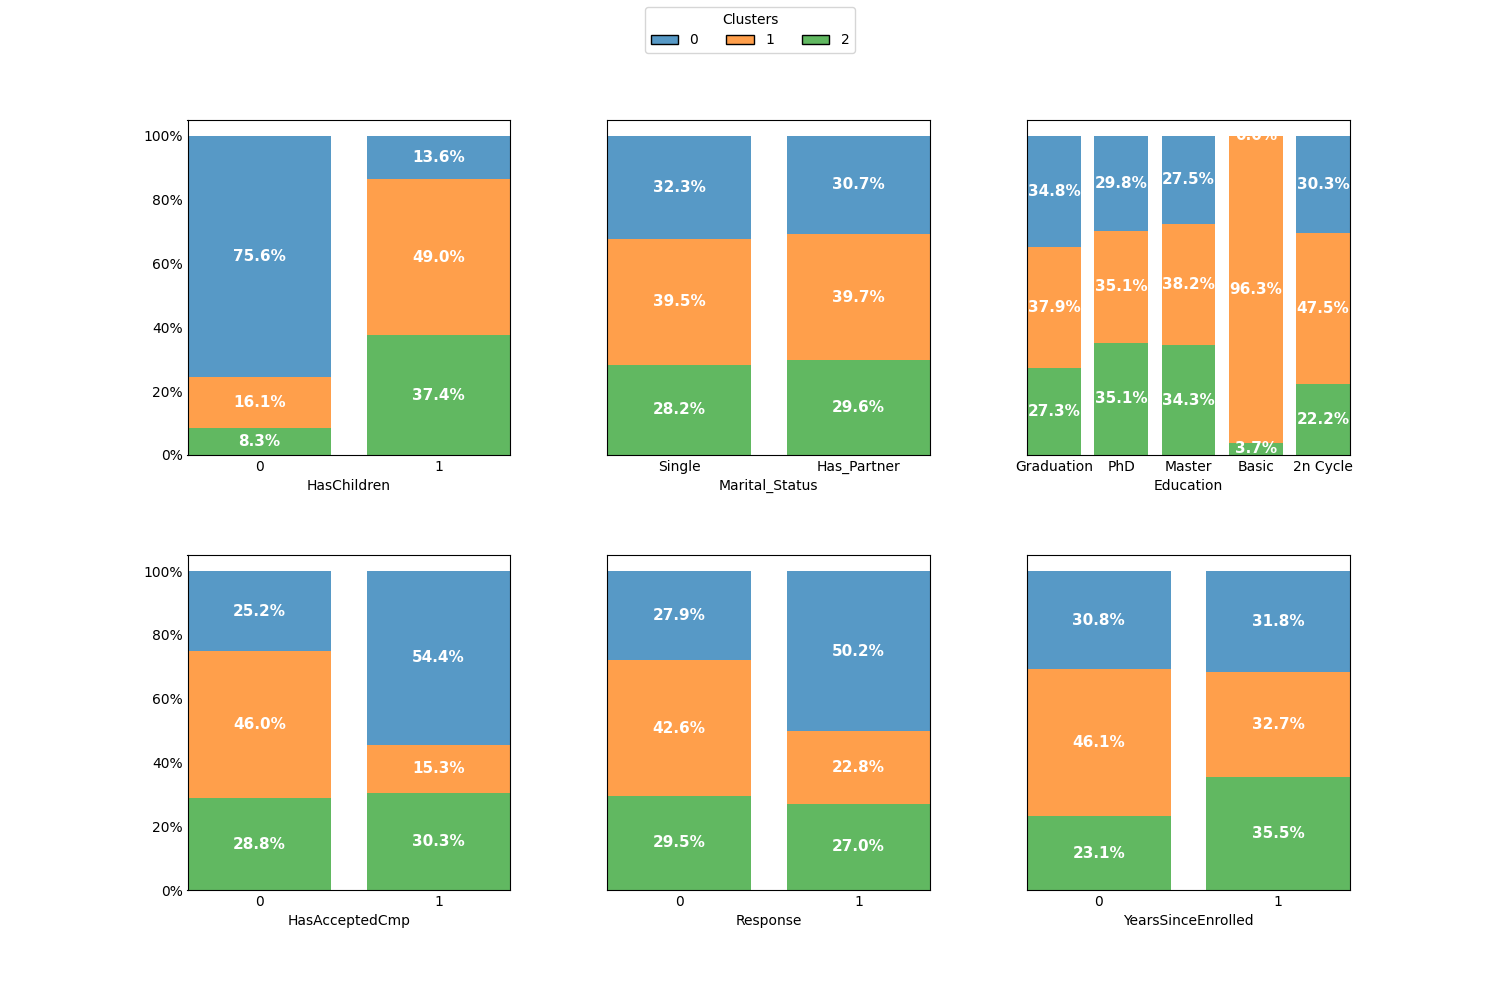

In [ ]:
plot_columns_percent_hue_cluster(DataClustered, columns,(2,3), figsize=(15,10), column_cluster='Cluster')

Análise por cluster:

- Cluster 0: 
  - Renda alta 
  - gasto alto 
  - muito provalmente não tem filhos
  - mais propenso a aceitar campanhas
  - cluster sem pessoas com escolaridade básica
  - sem um perfil de idade que se destaque
  

- Cluster 1: 
  - Renda baixa 
  - gasto baixo 
  - provalmente tem filhos
  - baixa propensão a aceitar campanhas
  - único cluster com porcentagem significativa de pessoas com escolaridade básica
  - pessoas mais jovens
  

- Cluster 2: 
  - Renda intermediária
  - gasto intermediário
  - provalmente tem filhos
  - pode aceitar campanhas
  - pessoas com idade mais elevada